# Data science data report
*BN, 1/17/2025, Data science II*

Here is the Gym excersise data set:
https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/discussion/543798
This data takes stats of people doing a workout such as their height and age then takes their workout stats such as what they did and how long they were there.

I was suprised by how similar all the workout types are relative to each other. Most people have strong beliefs on which workout type is the best, including me. Its interesting to see that the different workout types are all great workouts.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

df["lbs"] = df["Weight (kg)"] * 2.205
df["ft"] = df["Height (m)"]*3.28084
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,lbs,ft
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,194.7015,5.610236
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,165.1545,5.019685
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,150.1605,5.446194
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,117.3060,5.577428
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,101.6505,5.872704


# Calories burned vs Session duration
This graph proves the most basic correlation. The longer you are working out, the more calories you burn and the higher your heartrate will be. Hard work is important too because your heartrate needs to be high in order to burn a good amount of calories. While still very correlated, there is a larger spread as people spend longer in the gym. There is a decent amount of people who are spending two hours at the gym, but still only manage to burn low amounts of calories. You can see by their heartrate this was due to their intensity being low.

In [3]:


fig = px.scatter(
    df,
    x="Session_Duration (hours)",
    y="Calories_Burned",
    trendline="ols", 
    title="Session Duration vs. Calories Burned",
    labels={"Session_Duration (hours)": "Session Duration (hours)", "Calories_Burned": "Calories Burned"},
    color="Avg_BPM"
)

fig.show()

# Calories burned vs workout type
This graph shows the calories burned per workout type. The average calories are mostly even. HIIT will burn the most which makes sense. It was important to turn Calories burned to calories burned per house (which I marked as intensity). This is becaues cardio normally has shorter session times. I am suprised by how many calories an house of yoga will burn considering there is not as much movement. 

In [4]:

df['intensity'] = df["Calories_Burned"]/df["Session_Duration (hours)"]

workout_avg = df.groupby("Workout_Type")["intensity"].mean().round().reset_index()

fig = px.bar(
    workout_avg,
    x="Workout_Type",
    y="intensity",
    title="Average Calories Burned by Workout Type",
    labels={"Workout_Type": "Workout Type", "intensity": "Calories per hour"},
    text="intensity", 
)

fig.show()


# Session duration vs Water Intake

Its the average session duration based on water intake. However there are two big spikes for people who drink 2.7 and 3.5. The only claim I can make is that these are the healthy ends of water drinking for people who take creatine and do not. This dedication to water drinking could be correlated to more gym dedication. 

In [5]:
grouped = df.groupby("Water_Intake (liters)")["Session_Duration (hours)"].mean().reset_index()

fig = px.line(
    grouped,
    x="Water_Intake (liters)",
    y="Session_Duration (hours)",
    title="Average Calories Burned by Water Intake",
    labels={"Water_Intake (liters)": "Water Intake (liters)", "Session_Duration (hours)": "Session_Duration (hours)"},
)
fig.update_layout(
    xaxis=dict(
        dtick=0.1  
    ),

)

fig.update_traces(line=dict(width=3))
fig.show()

# Most popular workout types

This pie chart shows the most popular workout types. Strength training is the most popular, followed by cardio, which makes sense.

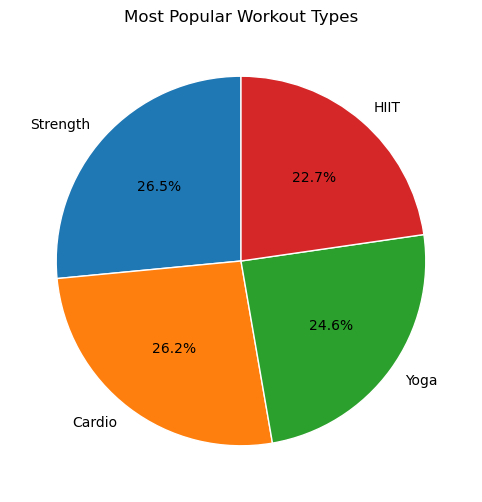

In [6]:
workout_counts = df["Workout_Type"].value_counts()


fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    workout_counts, 
    labels=workout_counts.index, 
    autopct='%1.1f%%',  
    startangle=90, 
    wedgeprops={'edgecolor': 'white'}, 
)


ax.set_title("Most Popular Workout Types")


plt.show()



# Conclusion

I always thought strength training was the best workout type by far. While I still prefer it, I see that all these workout types with the right amount of time and intensity can be very benficial. Overall, this data does not insight lots of change. However, knowing more exact data can help people make micro adjustments. Microadjustments in the long term can create big change.